In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sc
%matplotlib inline

# Read in Data

In [2]:
df_user = pd.read_csv('data/user_table.csv')

In [3]:
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [5]:
df_test = pd.read_csv('data/test_table.csv')

In [6]:
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


# Merge two Datasets

In [8]:
# Merget the user and test dataset.
df = pd.merge(df_user, df_test, how='outer')

In [9]:
df.head()

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20.0,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27.0,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23.0,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27.0,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20.0,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


# Compare Conversion Rates in Control and Test Group.

In [11]:
# Extract the data from control group.
df_control = df[df.test == 0].groupby('conversion').country.value_counts().unstack()

In [12]:
df_control

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Spain,Uruguay,Venezuela
conversion,,,,,,,,,,,,,,,,,
0,9215,5276,9379,25677,2521,7641,3888,7236,4139,61031,3239,1874,3473,16027,47654,410,15336
1,141,274,474,1411,139,395,220,386,222,3178,180,92,177,842,4128,5,813


In [13]:
# Since we mainly compare the conversion rate in the countries except Spain, we drop Spain.
df_control.drop('Spain', axis=1, inplace=True)

In [14]:
# The mean conversion rate in control group is around 4.8%.
df_control_mean = df_control.loc[1,:].sum() / df_control.values.sum()
df_control_mean

0.048291790557495239

In [15]:
df_control_rate = df_control.apply(lambda x: x[1]/x.sum())

In [16]:
# Argentina and Uruguay have much lower conversion rate compared with other countries.
df_control_rate.to_frame().T

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela
0,0.015071,0.049369,0.048107,0.052089,0.052256,0.049154,0.053554,0.050643,0.050906,0.049495,0.052647,0.046796,0.048493,0.049914,0.012048,0.050344


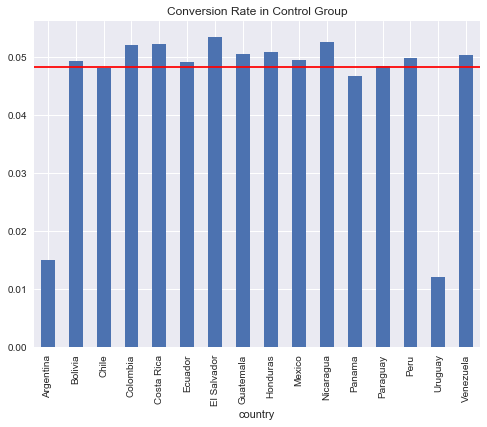

In [17]:
# Plot to show conversion rate comparisons in differnet contries in control group.
plt.rcParams['figure.figsize'] = (8,6)
df_control_rate.plot(kind='bar', title='Conversion Rate in Control Group')
plt.axhline(df_control_mean, color='r')
plt.show()

In [18]:
# Extract the data from test group.
df_test = df[df.test == 1].groupby('conversion').country.value_counts().unstack()

In [19]:
df_test

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela
conversion,,,,,,,,,,,,,,,,
0,36864,5307,9377,25608,2504,7474,3872,7138,4007,60985,3125,1887,3515,15947,3671,15126
1,513,267,507,1364,145,385,195,365,200,3290,179,98,182,850,48,779


In [20]:
# The mean conversion rate in test experiment is around 4.3%.
df_test_mean = df_test.loc[1,:].sum()/df_test.values.sum()
df_test_mean

0.043411161678422794

In [21]:
df_test_rate = df_test.apply(lambda x: x[1]/x.sum())

In [22]:
df_test_rate.to_frame().T

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela
0,0.013725,0.047901,0.051295,0.050571,0.054738,0.048988,0.047947,0.048647,0.04754,0.051186,0.054177,0.04937,0.049229,0.050604,0.012907,0.048978


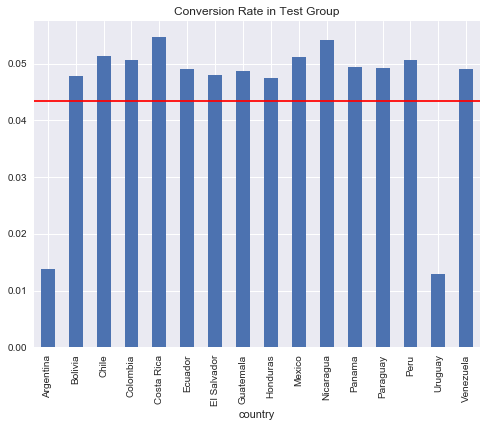

In [23]:
plt.rcParams['figure.figsize'] = (8,6)
df_test_rate.plot(kind='bar', title='Conversion Rate in Test Group')
plt.axhline(df_test_mean, color='r')
plt.show()

In [24]:
# From EDA and Analysis above, the mean conversion rate in control group is 4.8%, while\
# is 4.3% in test group. So it seems that we can say the old version without localization\
# is better, but is that true? Let's dig deeper!

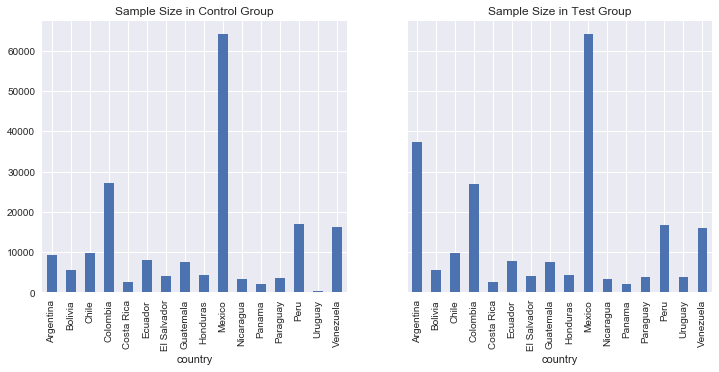

In [25]:
# From the graph below, we can tell there is a big difference in the sample size in Argentina\
# and Uruguay in control and test groups. 
fig,axs = plt.subplots(1, 2, sharey=True, figsize =(12,5))
df_control.sum(axis=0).plot(kind='bar',ax=axs[0], title='Sample Size in Control Group')
df_test.sum(axis=0).plot(kind='bar',ax=axs[1], title='Sample Size in Test Group')
plt.show()

In [26]:
# Now we specifically check the sample size percentages in control group.
# Argentina and Uruguay have relatively low conversion than others. While Uruguay only accounts\
# for 1.7% of total observations, 17.3% of observations are collected from Argentina. So the \
# conversion rate in Argentina's data will impact the overall results.
(df_test.sum(axis=0)/df_test.values.sum()).to_frame().T

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela
0,0.173223,0.025833,0.045807,0.125001,0.012277,0.036422,0.018848,0.034772,0.019497,0.297881,0.015312,0.009199,0.017134,0.077845,0.017236,0.073711


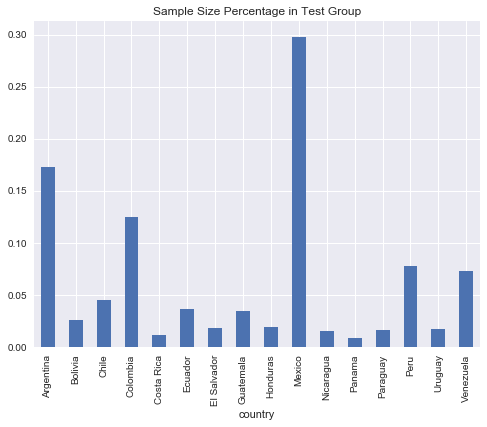

In [27]:
(df_test.sum(axis=0)/df_test.values.sum()).plot(kind='bar')
plt.title('Sample Size Percentage in Test Group')
plt.show()

In [28]:
# Now we run hypothesis test on each country between control and test groups.
# H0: There is no conversion rate difference between control and test groups;
# H1: There is conversion rate difference between control and test groups.

In [29]:
country_list = df_control.columns.values
def check_p_val(country_list):
    result = pd.DataFrame()
    for country in country_list:
        cg = df[(df.country == country) & (df.test == 0)].conversion
        tg = df[(df.country == country) & (df.test == 1)].conversion
        p_val = sc.ttest_ind(cg, tg, equal_var=False)[1]
        result = result.append(dict(country=country, p_value=p_val), ignore_index=True)
    return result

In [30]:
# We set alpha_value to 5%. From the t_test we performed, we can conclude that there is\
# no conversion rate difference between control and test groups.
check_p_val(country_list)

,country,p_value
0,Argentina,0.335147
1,Bolivia,0.718885
2,Chile,0.302848
3,Colombia,0.423719
4,Costa Rica,0.687876
5,Ecuador,0.961512
6,El Salvador,0.248127
7,Guatemala,0.572107
8,Honduras,0.471463
9,Mexico,0.165544
